In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import cv2
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid

def show_img(img, dpi=150, title=None):
    fig, ax = plt.subplots(nrows=1, ncols=1, dpi=dpi)
    ax.set_title( title, fontsize=16, color='black')
    ax.axis('off')
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    return fig, ax

In [5]:
def calc_max_cropSize(img_shape:tuple, crop_aspect:tuple):
    img_height, img_width = img_shape[:2]
    aspect_height, aspect_width = crop_aspect[:2]
    crop_height, crop_width = None, None

    # 切り取りサイズが縦長の場合
    if aspect_height >= aspect_width:
        crop_height = int(img_height)
        crop_width  = int((img_height/aspect_height)*aspect_width)

    # 切り取りサイズが横長の場合
    else:
        crop_width  = int(img_width)
        crop_height = int(img_width*(aspect_height/aspect_width))

    crop_shape = (crop_height, crop_width)
    center_pt = (int(img_width/2), int(img_height/2))

    return crop_shape, center_pt

def calc_crop_pt(img:np.ndarray, center_pt:tuple, crop_shape:tuple):
    pt1 = (int(center_pt[0]-(crop_shape[1]/2)), 0)
    pt2 = (int(pt1[0]+crop_shape[1]), crop_shape[0])
    return (pt1, pt2)

def image_crop(img:np.ndarray, pt1, pt2):

    # check
    if (pt1[0] > pt2[0]) or (pt1[1] > pt2[1]):
        raise Exception("pt2 must be large value than pt1.")
    if pt1[0] < 0 or pt1[1] < 0:
        raise Exception("pt1 is invalid value.")
    if pt2[0] > img.shape[1] or pt2[1] > img.shape[0]:
        raise Exception("pt2 is invalid value.")

    return img[pt1[1]:pt2[1], pt1[0]:pt2[0]]

(<Figure size 960x720 with 1 Axes>, <Axes: >)

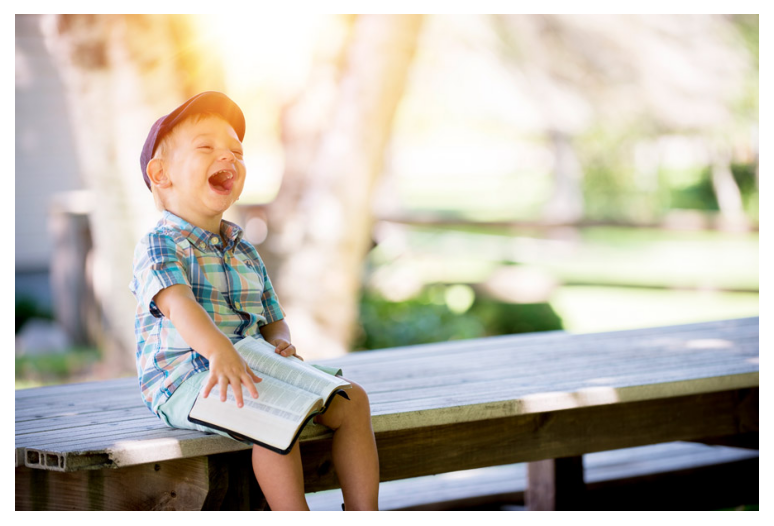

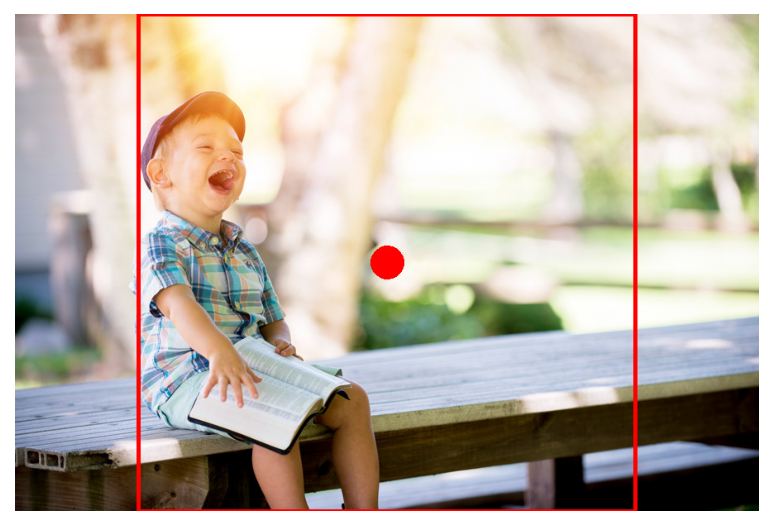

In [6]:
def draw_crop_range(img, center_pt, pt1, pt2):
    cv2.circle(img,
           center=center_pt,
           radius=20,
           color=(0, 0, 255),
           thickness=-1,
           lineType=cv2.LINE_4,
           shift=0)
    
    cv2.rectangle(img,
            pt1=pt1,
            pt2=pt2,
            color=(0, 0, 255),
            thickness=4,
            lineType=cv2.LINE_4,
            shift=0)
    
    return img

img_path = "../../sample_data/sample_jpg.jpg"
img = cv2.imread(img_path)
show_img(img)

crop_shape, center_pt = calc_max_cropSize(img.shape[:2], crop_aspect=(3, 3))
pt1, pt2 = calc_crop_pt(img, center_pt, crop_shape)

show_img(draw_crop_range(img, center_pt, pt1, pt2))

